## Title of the Project : RL -Quant 
### RL agent to maximize stock trading profits while managing risk

Name: Mahima Sahu

Student ID: 23b2231






#### Source of my data: 
The Alpaca API is a powerful tool for accessing financial market data and trading operations. It is particularly useful for finance-related projects, including those involving reinforcement learning (RL).


Key Features of Alpaca API:

1. Market Data: Provides real-time and historical market data for stocks and cryptocurrencies.
2. Trading: Allows for automated trading with commission-free trading for U.S. stocks.
3. Paper Trading: Offers a paper trading environment to test strategies without risking real money.
4. Account Management: Access to account information, including portfolio positions and order history

So, Now we load the data from ALPACA using api keys.

In [1]:
import os
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

#The keys are stored in the .env file
# Retrieve API keys from environment variables (using os.getenv for safety)
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")

# Ensure keys exist before proceeding
if not api_key or not secret_key:
    raise ValueError("Missing API keys. Check your .env file!")

# Initialize Alpaca API
api = tradeapi.REST(api_key, secret_key, base_url="https://paper-api.alpaca.markets")

# Check account status
account = api.get_account()
print(f"Account Status: {account.status}")


Account Status: ACTIVE


In [2]:
#importing libraries

import alpaca_trade_api as tradeapi
import pandas as pd
import cupy as cp  # GPU-accelerated NumPy alternative
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")




This code fetches and preprocesses historical stock data for Apple Inc. (AAPL) using the Alpaca API:

Define Parameters: Set the stock symbol (AAPL), timeframe (daily), and date range (2018-01-01 to 2022-05-31).

Fetch Data: Retrieve historical stock data using the Alpaca API.

Data Preprocessing: Reset the index, rename columns, convert the 'Date' column to datetime format, and set it as the index.

Display and Save Data: Print the first few rows and save the data to a CSV file named "AAPL_stock_data.csv"

In [3]:

# Define parameters
ticker = "AAPL"  # Stock symbol (company : Apple Inc.)
timeframe = "1Day"  # Timeframe options: "1Min", "5Min", "15Min", "1Hour", "1Day"

# Define date range ( This is the data I will be using to train the model)
start_date = "2018-01-01"  # Start date for historical data
end_date = "2022-05-31"  # End date for historical data

# Fetch historical stock data
bars = api.get_bars(ticker, timeframe, start=start_date, end=end_date).df

# Data Preprocessing
bars.reset_index(inplace=True)
bars.rename(columns={'timestamp': 'Date', 'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)
bars['Date'] = pd.to_datetime(bars['Date'])
bars.set_index('Date', inplace=True)

# Display first few rows
print(bars.head())

bars.to_csv("AAPL_stock_data.csv")

print("Data saved to CSV file.")

                            Close    High     Low  trade_count    Open  \
Date                                                                     
2018-01-02 05:00:00+00:00  172.26  172.30  169.26       177088  170.16   
2018-01-03 05:00:00+00:00  172.23  174.55  171.96       188340  172.53   
2018-01-04 05:00:00+00:00  173.03  173.47  172.08       153154  172.54   
2018-01-05 05:00:00+00:00  175.00  175.37  173.05       152077  173.44   
2018-01-08 05:00:00+00:00  174.35  175.61  173.93       138848  174.35   

                             Volume        vwap  
Date                                             
2018-01-02 05:00:00+00:00  27641744  171.378702  
2018-01-03 05:00:00+00:00  31760108  173.068527  
2018-01-04 05:00:00+00:00  24390260  172.987175  
2018-01-05 05:00:00+00:00  26239861  174.686561  
2018-01-08 05:00:00+00:00  22729369  174.610658  
Data saved to CSV file.


In [4]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('AAPL_stock_data.csv')

# Get the dimensions of the dataset
dimensions = df.shape
print(f'Dimensions (rows, columns): {dimensions}')

# Get the total number of elements in the dataset
size = df.size
print(f'Total number of elements: {size}')

Dimensions (rows, columns): (1111, 8)
Total number of elements: 8888


In [5]:
# lets find the earliest and latest date in the dataset

print("Earliest Date:", bars.index.min())
print("Latest Date:", bars.index.max())

Earliest Date: 2018-01-02 05:00:00+00:00
Latest Date: 2022-05-31 04:00:00+00:00


In [6]:
# Check for missing values
missing_values = bars.isnull().sum()
print("\nMissing Values in Data:")
print(missing_values)


Missing Values in Data:
Close          0
High           0
Low            0
trade_count    0
Open           0
Volume         0
vwap           0
dtype: int64


So, we see that there are no missing values. Thus, our data is free of any missing values. 

Now, I have made plots for different visualizations of the financial data of Apple

## Visualizing Price trends

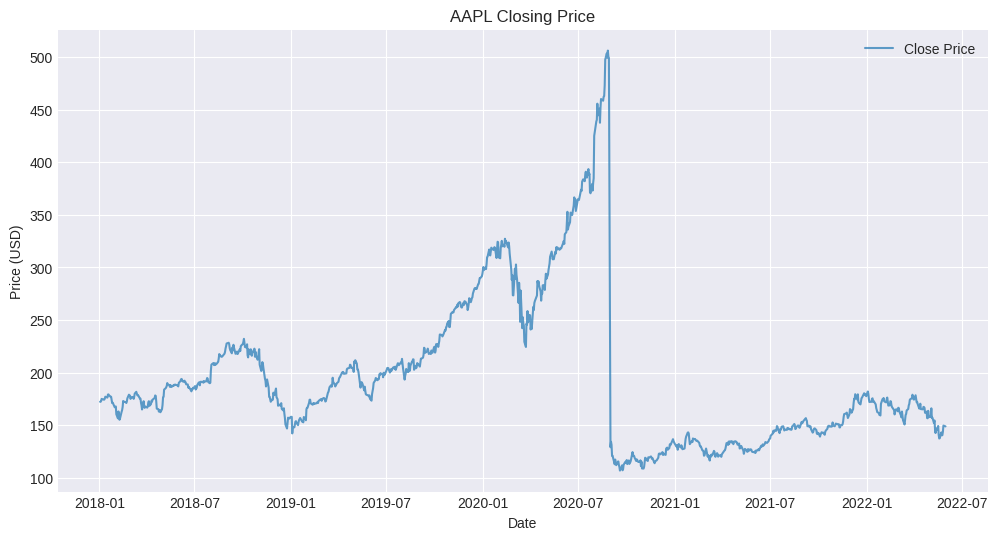

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(bars['Close'], label="Close Price", alpha=0.7)
plt.title(f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


### AAPL Stock Price Analysis (2018-2022)


The graph displays the closing price of Apple Inc. (AAPL) from 2018 to mid-2022, showing key trends, volatility, and significant market movements.  

### Observations  

#### **1. Pre-2020 Steady Growth (2018-2019)**  
- AAPL stock showed a general **upward trend** with periodic fluctuations.  
- There were **dips in late 2018 and early 2019**, This can likely be due to concerns over global economic slowdown and U.S.-China trade tensions.  

#### **2. Sharp Increase in Early 2020**
- In early 2020, AAPL stock price surged, reflecting **strong financial performance, growing iPhone sales, and increasing investor confidence in tech stocks**.  
- This period saw a rise in many technology stocks, fueled by **pre-pandemic optimism and strong market momentum**.  

#### **3. COVID-19 Crash & Recovery (March 2020 - Mid-2020)**  
- The sharp **decline in early 2020** aligns with the **COVID-19 pandemic-induced stock market crash (March 2020)**.  
- Investor panic, global economic uncertainty, and lockdown measures led to a **massive sell-off in the stock market**, including AAPL.  
- However, **tech stocks rebounded faster** than other sectors as demand for digital services, remote work tools, and online shopping skyrocketed.  

#### **4. Stock Split Impact (August 2020 Drop)**  
- The sudden **sharp drop in mid-2020** was due to **Apple’s 4-for-1 stock split on August 31, 2020**.  
- This **did not reduce Apple's market value**, but it made shares more affordable, boosting liquidity and accessibility for smaller investors.  

#### **5. Post-2020 Trends**  
- Following the stock split, AAPL saw a relatively **stable but fluctuating trend**, influenced by macroeconomic factors like:  
  - **Rising inflation concerns (2021-2022)**  
  - **Interest rate hikes by the Federal Reserve**  
  - **Supply chain disruptions affecting product availability**  

#### Conclusion  
The **COVID-19 pandemic and Apple's stock split were major factors** driving price movements in 2020. While the initial panic caused a sharp decline, the rapid market recovery, increased demand for tech, and strategic corporate decisions helped AAPL regain momentum. Post-2020 trends reflect ongoing market adjustments to economic conditions.  


Now, I have tried to put some trendlines to reflect how the prices changes over the years

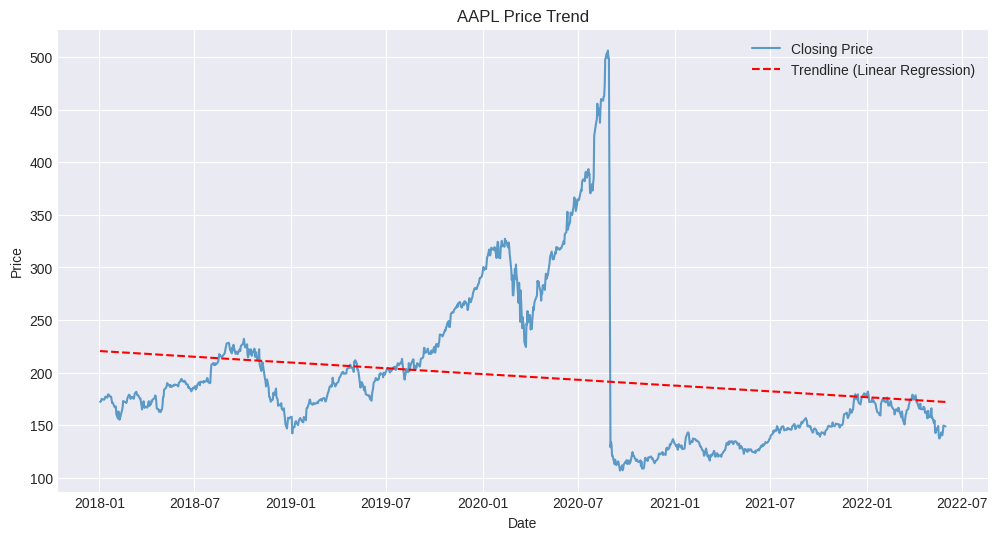

In [8]:
from scipy.stats import linregress
import numpy as np

# Convert Date to numerical values for regression
bars["Date_Num"] = np.arange(len(bars))

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(bars["Date_Num"], bars["Close"])

# Compute trendline
bars["Trendline"] = intercept + slope * bars["Date_Num"]

# Plot trend
plt.figure(figsize=(12, 6))
plt.plot(bars["Close"], label="Closing Price", alpha=0.7)
plt.plot(bars["Trendline"], linestyle="dashed", color="red", label="Trendline (Linear Regression)")
plt.legend()
plt.title(f"{ticker} Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


This graph presents the **closing price** of Apple Inc. (AAPL) from 2018 to mid-2022, along with a **linear regression trendline** (red dashed line) to depict the overall trend.


 **1.  Linear Regression and Its Limitation**  
- The red **linear regression trendline appears relatively flat**, indicating a slight **downward** trend over the entire period.  
- However, this **does not accurately represent** the stock’s actual movement.  

**2.We can say that Linear Regression Fails Here because of**  
- The **AAPL stock price experienced multiple phases**:  
  - **Uptrend in early 2020** (pre-COVID surge)  
  - **Sharp decline due to COVID-19 market crash**  
  - **Recovery and new highs in mid-2020**  
  - **Stock split adjustment in August 2020**  
  - **Fluctuating movement post-2021**  
- A **single linear trendline** fails to reflect these variations and instead **nullifies the effect** of major rallies and crashes.

**3. Alternative Approaches for Better Trend Analysis**  
To gain better insights, we can consider:  
- **Polynomial Regression** → Captures non-linear trends.  
- **Moving Averages (SMA, EMA)** → Highlights short-term and long-term momentum.  
- **Piecewise Regression** → Fits different trendlines for different phases.  
- **Time-Series Decomposition** → Analyzes seasonal and trend components separately.  

#### Conclusion  
The linear regression model **oversimplifies** stock price trends by averaging out crucial movements. A more advanced approach, such as polynomial regression or moving averages, would provide **a more realistic representation** of AAPL's stock price over time.  



### Moving Averages

##### What These Indicators Do?
1. SMA (Simple Moving Average) → Smooths price fluctuations over 50 days.
2. EMA (Exponential Moving Average) → Gives more weight to recent prices, reacts faster to price changes.

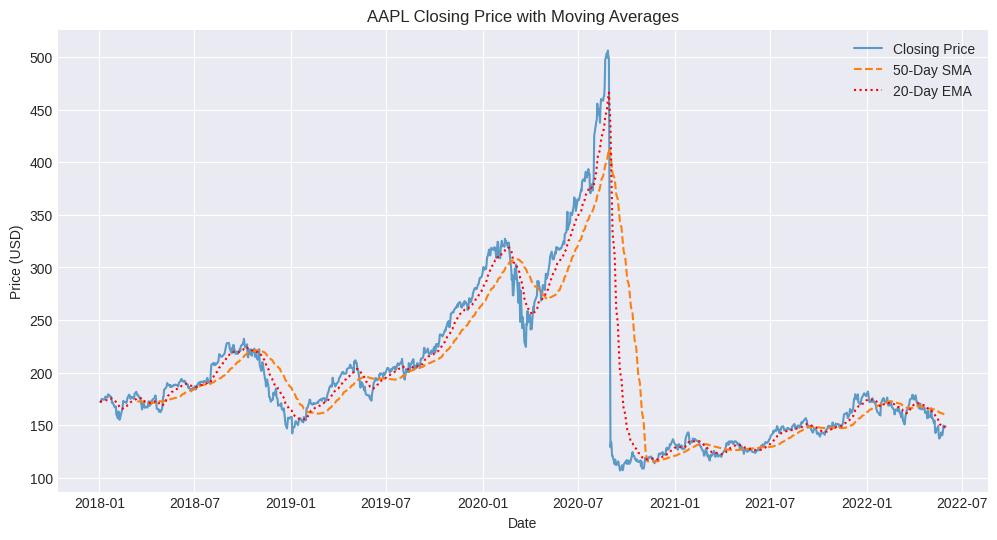

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (ensure 'Date' column is parsed as datetime)
df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Compute 50-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["EMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()

# Plot Closing Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Closing Price", alpha=0.7)
plt.plot(df["SMA_50"], label="50-Day SMA", linestyle="dashed")
plt.plot(df["EMA_20"], label="20-Day EMA", linestyle="dotted", color="red")

plt.title("AAPL Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()



So, from the graph we can see that the moving average method gives us a much better price trendline, it almost resembles with the pattern formed by  actual data

##  Seasonality Analysis using Time-Series Decomposition

I had decomposed the closing prices of AAPL stock into its underlying components to better understand the trend, seasonal patterns, and residual variations.

- The seasonal_decompose function is used to decompose the 'Close' price time series into three components: trend, seasonality, and residuals.
- The model is set to "multiplicative" to account for the multiplicative relationship between components.
- The period is set to 252, representing the number of trading days in a year.


##### Multiplicative Model

- Seasonal variations increase or decrease proportionally with the trend.
- Stock price fluctuations grow as the price increases.
- Example: AAPL stock price where seasonal effects grow larger over time

Y(t)=Trend(t)×Seasonality(t)×Residuals(t)


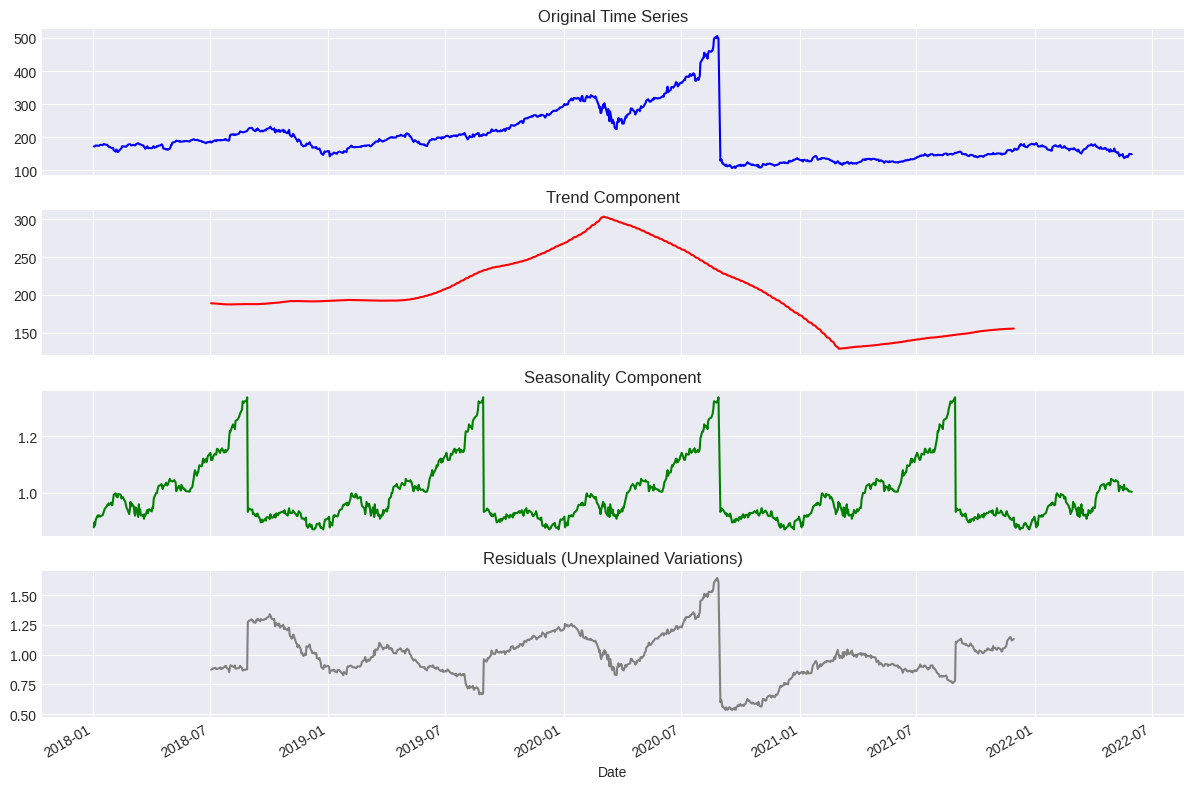

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load stock data
df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Perform Seasonal Decomposition
decomposition = seasonal_decompose(df["Close"], model="multiplicative", period=252)  # 252 trading days in a year

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

df["Close"].plot(ax=axes[0], title="Original Time Series", color="blue")
decomposition.trend.plot(ax=axes[1], title="Trend Component", color="red")
decomposition.seasonal.plot(ax=axes[2], title="Seasonality Component", color="green")
decomposition.resid.plot(ax=axes[3], title="Residuals (Unexplained Variations)", color="gray")

plt.tight_layout()
plt.show()


Brief Interpretation of Seasonal Decomposition
1. Trend Component
Upward trend from 2018 to mid-2020, followed by a peak in 2021 and then a decline.
Indicates a long-term growth phase before a market correction.
2. Seasonality Component
Repeating annual cycles, likely due to earnings reports or investor behavior.
Seasonal variations scale with price, suggesting a multiplicative model may be better.
3. Residuals (Unexplained Variations)
Sudden jumps around 2021, possibly due to a stock split or external economic event.
If residuals are random, the model fits well; if not, hidden factors may be influencing the stock.

## Volatility Analysis using Bollinger Bands

Next, I have done volatility analysis to measure the degree of price variation over time. It is used to:

- Assess Risk: Higher volatility indicates higher risk.
- Identify Trading Opportunities: Helps spot overbought or oversold conditions.
- Set Stop-Loss/Take-Profit Levels: Adjusts levels based on market volatility.
- Option Pricing: Influences the premium of options.

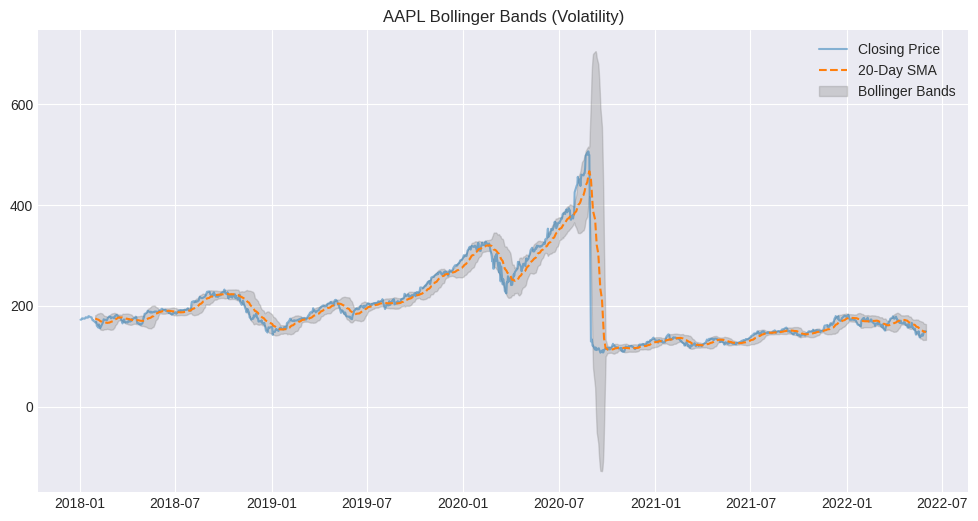

In [11]:
bars["SMA_20"] = bars["Close"].rolling(window=20).mean()
bars["Upper_Band"] = bars["SMA_20"] + (2 * bars["Close"].rolling(window=20).std())
bars["Lower_Band"] = bars["SMA_20"] - (2 * bars["Close"].rolling(window=20).std())

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(bars["Close"], label="Closing Price", alpha=0.5)
plt.plot(bars["SMA_20"], label="20-Day SMA", linestyle="dashed")
plt.fill_between(bars.index, bars["Upper_Band"], bars["Lower_Band"], color='gray', alpha=0.3, label="Bollinger Bands")
plt.legend()
plt.title(f"{ticker} Bollinger Bands (Volatility)")
plt.show()


This code calculates and plots Bollinger Bands for AAPL:

1. Calculate Bollinger Bands:

- SMA_20: 20-day Simple Moving Average.
- Upper_Band and Lower_Band: SMA ± 2 standard deviations.

2. Plot Bollinger Bands:
- Plot closing prices, 20-day SMA, and Bollinger Bands.
- Shade the area between the bands.


Interpretation:

- Price near Upper Band → Overbought (possible reversal)
- Price near Lower Band → Oversold (buying opportunity)
- Bands widening → High volatility
- Bands narrowing → Low volatility (possible breakout soon)


### Volatility Clustering using Rolling Standard Deviation


Rolling standard deviation is crucial for:

- Measuring Volatility: Tracks changes in volatility over time.
- Risk Assessment: Higher values indicate higher risk.
- Volatility Clustering: Identifies periods of consistent high or low volatility.

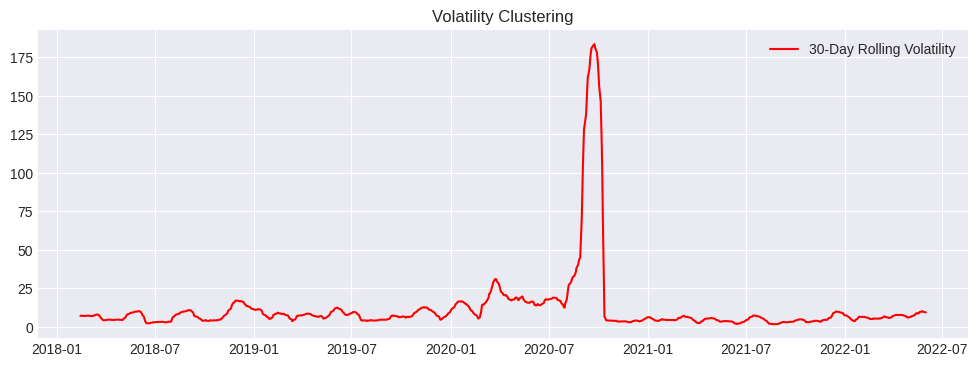

In [12]:
bars["Rolling_Std_30"] = bars["Close"].rolling(window=30).std()

plt.figure(figsize=(12, 4))
plt.plot(bars["Rolling_Std_30"], label="30-Day Rolling Volatility", color="red")
plt.legend()
plt.title("Volatility Clustering")
plt.show()


Observations:

Higher values → Market instability (sharp moves).

Lower values → Stable market conditions.

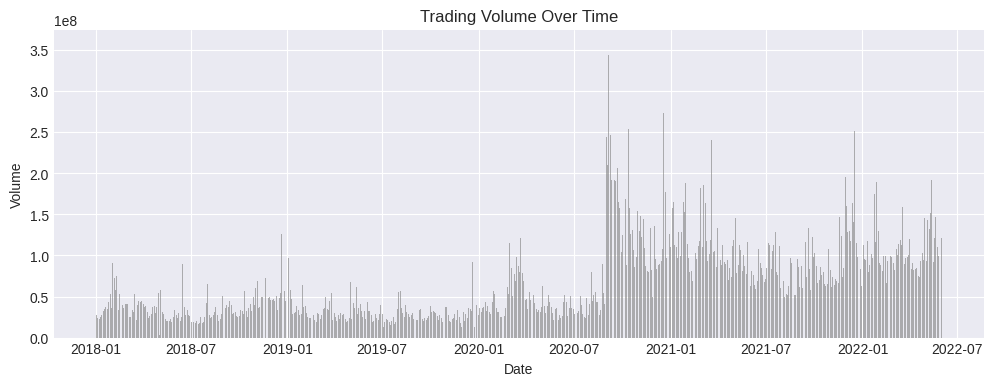

In [13]:
plt.figure(figsize=(12, 4))
plt.bar(bars.index, bars["Volume"], width=1, color='gray', alpha=0.6)
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


Observations:

- Spikes in volume may indicate breakout points.
- Low volume suggests weak price movements.

## Corelation Analysis

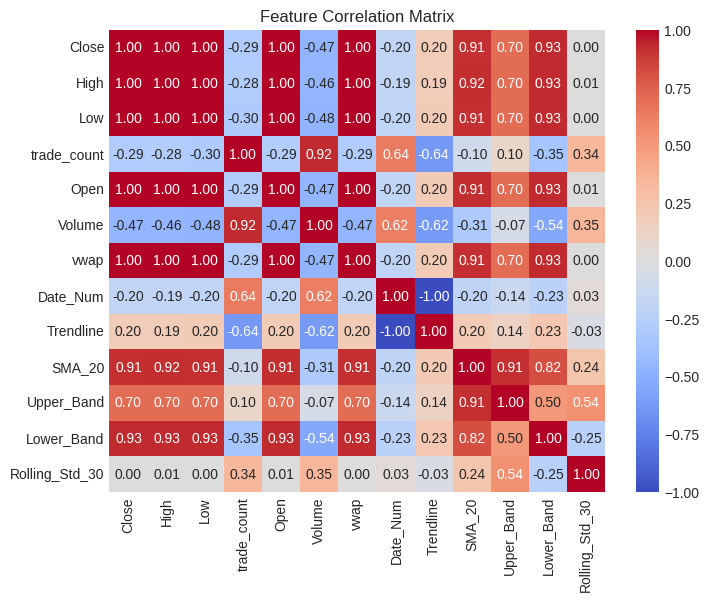

In [14]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(bars.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


From this correlation matrix, we can infer that:

- Price features like Close, High , Low , Open and vwap are highly interrelated.
- Trading volume and trade count are closely linked.
- Volatility (Rolling_Std_30) is more related to trading activity than to price levels.


#### Below I have made the different Numerical plots for Data

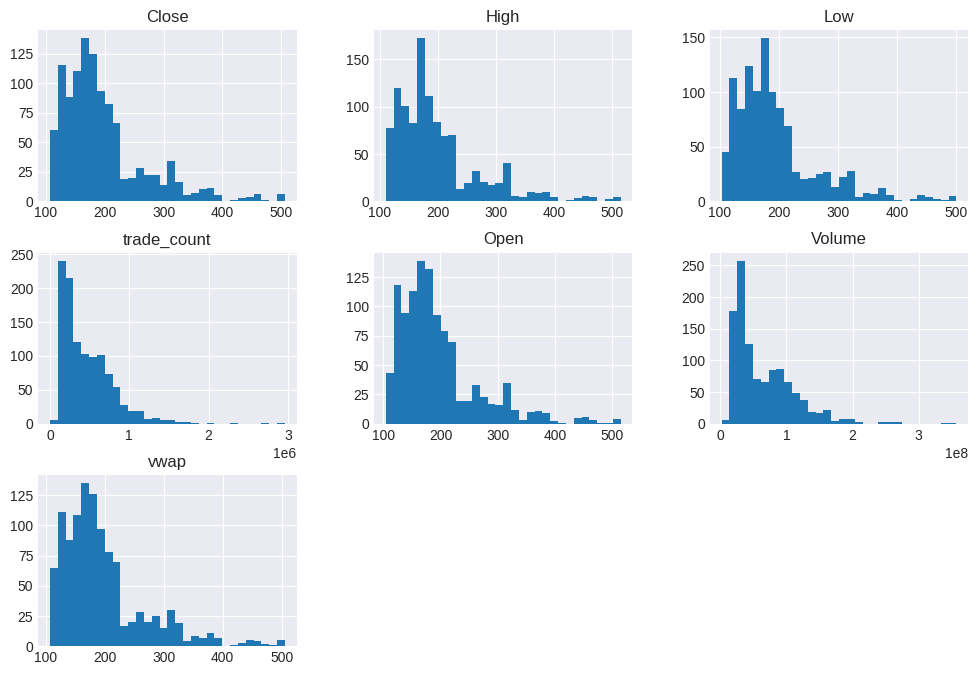

In [15]:
#Histogram

import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=30)
plt.show()


X-Axis: The range of closing prices divided into 30 bins.

Y-Axis: The number of days (or data points) that have closing prices within each bin.

Next, we plot the box plot for the data, the markers outside the box represent the outliers in our data. They show sudden fall or rise of markets.

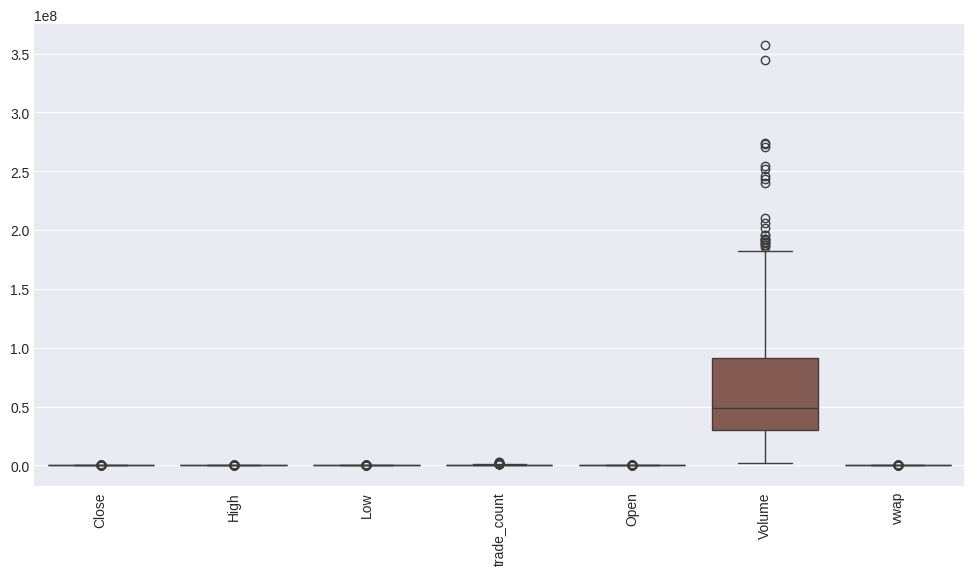

In [20]:
#Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()


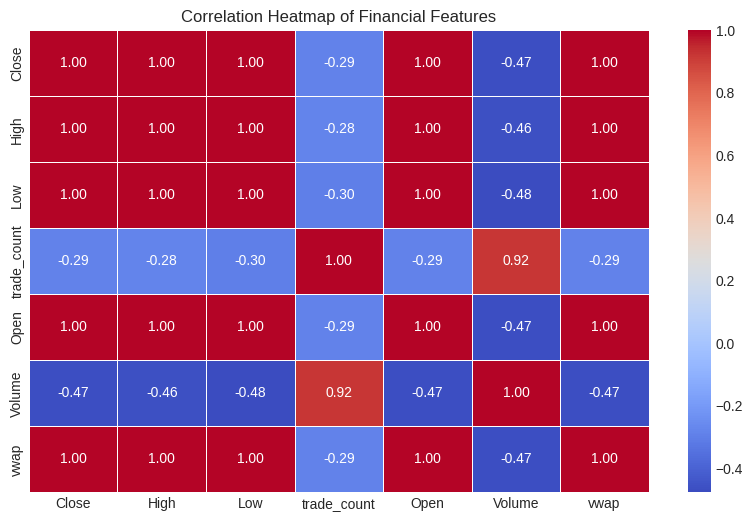

In [21]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Financial Features")
plt.show()

- High positive correlation (close to +1): Features move together (e.g., Closing Price & Moving Average).
- High negative correlation (close to -1): Features move in opposite directions (e.g., RSI & Price Drop).
- Low correlation (near 0): No strong linear relationship.

So, this was all about visualising and understanding about the data. Below I have tried to do some more analysis on the data to decide on which kinf of model or strategy I should follow for the project. 

## Trend Shift Detection (Structural Breaks)

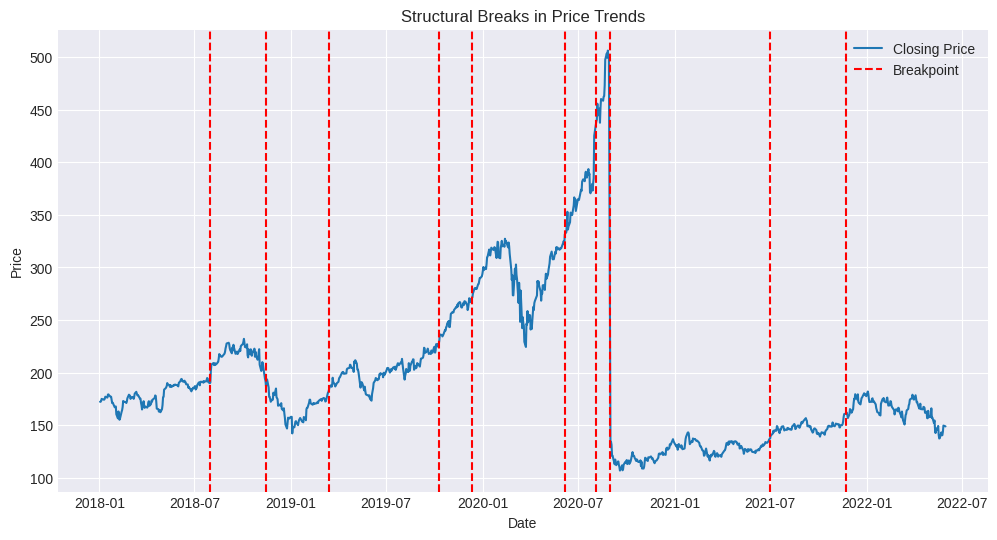

In [26]:
# This code detects and visualizes structural breaks in the closing prices of Apple Inc. 
# (AAPL) stock data using the Pelt model from the ruptures library. 
#  Structural breaks are points in time where the underlying data-generating process changes, 
# which can be useful for identifying regime shifts or other significant events in financial markets.



import ruptures as rpt
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Load dataset (ensure 'Date' column is parsed as datetime)
df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Detect structural breaks
breakpoints = rpt.Pelt(model="rbf").fit(df["Close"].values).predict(pen=10)

# Filter out any breakpoints that are out of bounds
breakpoints = [bp for bp in breakpoints if bp < len(df)]

# Plot the closing prices and structural breaks
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Closing Price")
for bp in breakpoints:
    plt.axvline(x=df.index[bp], color="red", linestyle="--", label="Breakpoint" if bp == breakpoints[0] else "")
plt.title("Structural Breaks in Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Observations from the plot:
- Structural breaks are detected at several points, indicating significant changes in the price trend.
- These breaks could correspond to major market events, earnings reports, or other significant occurrences affecting the stock price.
- The plot helps in identifying periods of trend shifts, which can be useful for further analysis or trading strategy development.

I got multiple breakpoints using this method, so I had shifted to using Pettitts test , which is more robust method to find breakpoints in the data. 

Pettitt’s Test Breakpoint: 2020-08-31 04:00:00+00:00


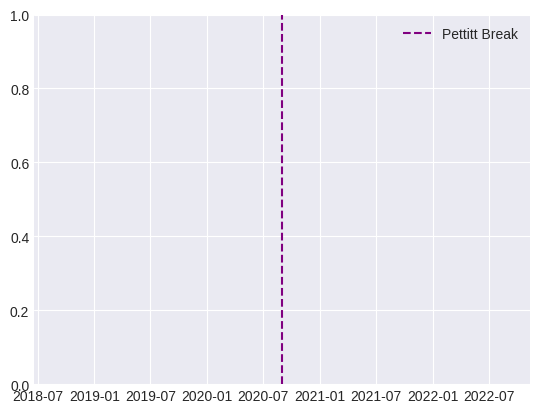

In [27]:
from scipy.stats import rankdata, wilcoxon

def pettitt_test(series):
    n = len(series)
    ranks = rankdata(series)
    U = [sum(ranks[:t]) - t * (t + 1) / 2 for t in range(n)]
    K = np.argmax(np.abs(U))  # Point of maximum divergence
    return K, U[K]

# Apply Pettitt’s Test to detect structural break
break_pettitt, stat_pettitt = pettitt_test(df["Close"].values)
print(f"Pettitt’s Test Breakpoint: {df.index[break_pettitt]}")
plt.axvline(x=df.index[break_pettitt], color="purple", linestyle="--", label="Pettitt Break")
plt.legend()
plt.show()


So, we see in the graph that we got a single major breakpoint, at around 31 August 2020, this is very well figured out breakpoint as we can validate from the closing price graph, that the major breakpont was around late 2020's.

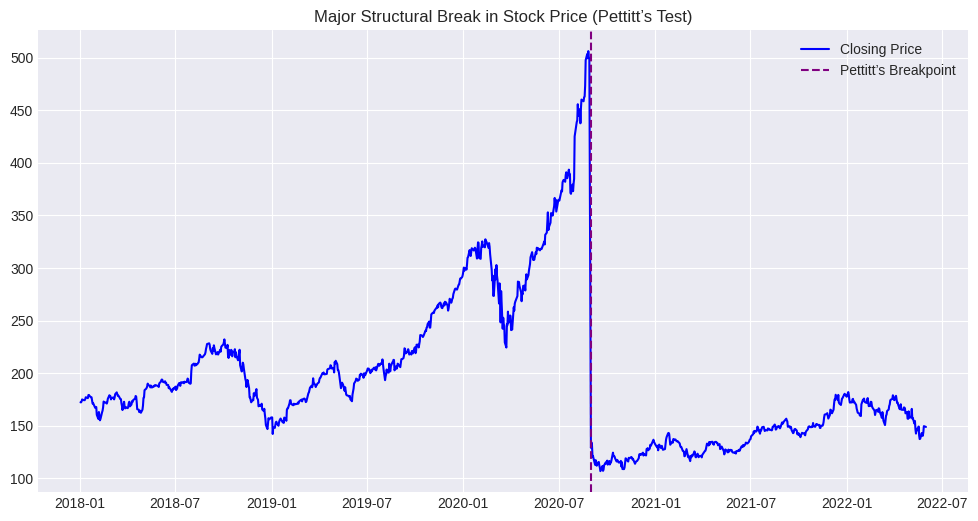

In [29]:
import matplotlib.pyplot as plt

# Assume break_pettitt is the index from Pettitt's test
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Closing Price", color="blue")

# Mark Pettitt’s detected breakpoint
plt.axvline(x=df.index[break_pettitt], color="purple", linestyle="--", label="Pettitt’s Breakpoint")

plt.legend()
plt.title("Major Structural Break in Stock Price (Pettitt’s Test)")
plt.show()


## Autocorrelation Analysis (Lags in Data)

Helps understand if past stock prices predict future prices.
If strong correlation exists, RL can use past prices as a feature.

<Figure size 1200x500 with 0 Axes>

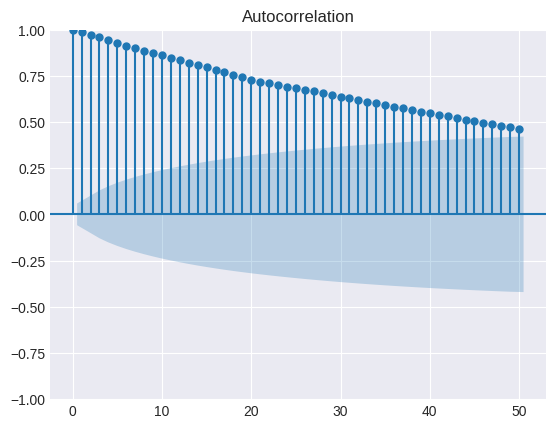

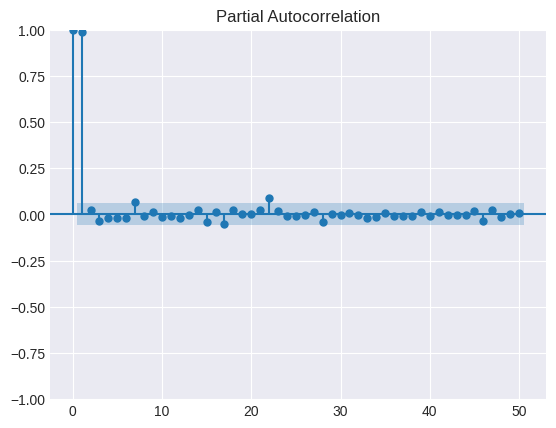

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF & PACF
plt.figure(figsize=(12,5))
plot_acf(df["Close"], lags=50)
plot_pacf(df["Close"], lags=50)
plt.show()


Analysis of ACF & PACF Graphs: 


1. Autocorrelation Function (ACF)
The ACF plot shows how the current price correlates with its past values.
A slow decay in ACF (gradually decreasing but staying positive) suggests a strong trend component in the time series.
The fact that the lags remain significant for a long period (all the way to lag 50) indicates the presence of long-term dependencies.

Implications:

The time series might be non-stationary, meaning it needs differencing before applying a traditional model like ARIMA.
The strong autocorrelation suggests an LSTM-based model could effectively capture the sequential dependencies.


2. Partial Autocorrelation Function (PACF)
The PACF plot shows a sharp cut-off after the first two lags, meaning that beyond lag 2, additional lags do not significantly add to the predictability.
The first two spikes suggest that only the most recent values influence future values directly.

Implications:

A simple AR(2) model (AutoRegressive model with lag 2) might work well.
If using reinforcement learning (RL), the agent should weigh recent trends more heavily than older trends.
For deep learning, an attention-based Transformer model could be useful, as it will focus on the most relevant past information

## Outlier Categorization (Distinguish Random Spikes)

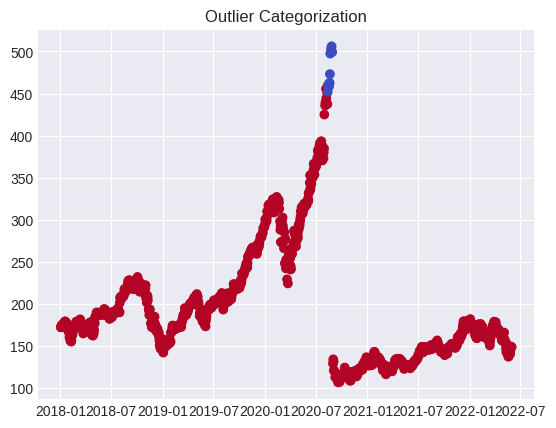

In [31]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01)
df["Outlier_Score"] = iso_forest.fit_predict(df[["Close"]])
plt.scatter(df.index, df["Close"], c=df["Outlier_Score"], cmap="coolwarm")
plt.title("Outlier Categorization")
plt.show()



outlier detection (IQR & Z-score) removes extreme shocks, but some outliers are valuable signals (e.g., high volatility = trade opportunity).
RL agent should learn to react to genuine market crashes differently than temporary spikes.


Observations from the Plot : 
- The plot shows a time series of stock prices with a significant spike around mid-2020.
- The majority of data points are plotted in red, indicating normal values.
- A few points at the peak around 2020 are highlighted in blue, suggesting they have been detected as outliers.
Here, I will be keeping the outliers as  we are using the breakpoint to segregate data into two halves for training.


So, after the EDA, I got lot of insights about the financial data and also about how can we decide on what further steps steps should be taken for RL agent. As of now: 
Next stage of the project involves: 

- Pre-Crash Model (Before Pettitt’s Breakpoint)

-- Train an RL agent on this dataset.

-- Learn trends, volatility, and stable patterns.

- Post-Crash Model (After Pettitt’s Breakpoint)

-- Train another RL agent on this dataset.

-- Learn from new market behavior.

-- Regime-Switching RL

Then I will combine both models using meta-learning (e.g., Markov Switching Models).
Allow the RL agent to dynamically switch strategies based on the detected regime.

Step 1: Data Preparation for RL
📌 Goal: Preprocess and structure the dataset into features & reward signals for RL.

Steps to Follow
1️⃣ Segment the dataset into two parts:

Pre-Crash Data (Before Pettitt's Breakpoint)
Post-Crash Data (After Pettitt's Breakpoint)
2️⃣ Feature Engineering (Suggested features):

Moving Averages (SMA, EMA)
Volatility Measures (ATR, Bollinger Bands)
Momentum Indicators (RSI, MACD)
Trend Indicators (ADX, Stochastic Oscillator)
3️⃣ Normalize and Structure Data for an RL-compatible environment.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load your dataset (Assuming a CSV file)
df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Example of Pettitt’s Breakpoint (Assume it was detected at a certain date)
breakpoint = "2020-07-01"

# Split Data
pre_crash_data = df[df.index < breakpoint]
post_crash_data = df[df.index >= breakpoint]

# Feature Engineering: Moving Averages, RSI, Volatility, MACD, etc.
def compute_features(data):
    data = data.copy()
    data["SMA_50"] = data["Close"].rolling(window=50).mean()
    data["SMA_200"] = data["Close"].rolling(window=200).mean()
    data["Volatility"] = data["Close"].rolling(window=20).std()
    
    # Normalize features
    scaler = MinMaxScaler()
    features = ["SMA_50", "SMA_200", "Volatility"]
    data[features] = scaler.fit_transform(data[features])

    return data.dropna()

# Apply feature engineering
pre_crash_data = compute_features(pre_crash_data)
post_crash_data = compute_features(post_crash_data)

# Save for RL training
pre_crash_data.to_csv("pre_crash_data.csv")
post_crash_data.to_csv("post_crash_data.csv")


Building the RL environment : Creating a custom OpenAI Gym environment

In [6]:
import gym 
import numpy as np
import pandas as pd
from gym import spaces

In [7]:
class MarketEnv(gym.Env):
    def __init__(self,data):
        super(MarketEnv, self).__init__()
        self.data = data.reset_index()
        self.current_step = 0

        self.action_space = spaces.Discrete(2)  # 0 = sell, 1 = hold
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(self.data.columns),), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.data.iloc[self.current_step].values
    
    def step(self, action):
        self.current_step+=1 
        done = self.current_step >= len(self.data)-1

        reward = 0 ; 
        if action == 1: #Buy
            reward = self.data.iloc[self.current_step]["Close"] - self.data.iloc[self.current_step-1]["Close"]  # Reward is the price difference
        elif action ==2: #sell
            reward = self.data.iloc[self.current_step-1]["Close"] - self.data.iloc[self.current_step]["Close"]
        
        return self.data.iloc[self.current_step].values, reward, done, {}
    
#load and create environments

pre_crash_data = pd.read_csv("pre_crash_data.csv")
post_crash_data = pd.read_csv("post_crash_data.csv")

pre_cash_env = MarketEnv(pre_crash_data)
post_crash_env = MarketEnv(post_crash_data)


Training RL agents : Train two seprate RL models for pre crash and post crash data

Using stable-Baselines3 (PPO ALgorithm)

In [12]:
from stable_baselines3 import PPO

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO
import gym
from gym import spaces

# Load your dataset (Assuming a CSV file)
df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Example of Pettitt’s Breakpoint (Assume it was detected at a certain date)
breakpoint = "2020-07-01"

# Split Data
pre_crash_data = df[df.index < breakpoint]
post_crash_data = df[df.index >= breakpoint]

# Feature Engineering: Moving Averages, RSI, Volatility, MACD, etc.
def compute_features(data):
    data = data.copy()
    data["SMA_50"] = data["Close"].rolling(window=50).mean()
    data["SMA_200"] = data["Close"].rolling(window=200).mean()
    data["Volatility"] = data["Close"].rolling(window=20).std()
    
    # Normalize features
    scaler = MinMaxScaler()
    features = ["SMA_50", "SMA_200", "Volatility"]
    data[features] = scaler.fit_transform(data[features])

    return data.dropna()

# Apply feature engineering
pre_crash_data = compute_features(pre_crash_data)
post_crash_data = compute_features(post_crash_data)

# Define a custom environment
class StockTradingEnv(gym.Env):
    def __init__(self, data):
        super(StockTradingEnv, self).__init__()
        self.data = data
        self.current_step = 0
        self.action_space = spaces.Discrete(3)  # Buy, Hold, Sell
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(data.columns),), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.data.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.data):
            done = True
            reward = 0
            obs = self.data.iloc[-1].values  # Return the last observation
        else:
            done = False
            reward = self.data.iloc[self.current_step]["Close"] - self.data.iloc[self.current_step - 1]["Close"]
            obs = self.data.iloc[self.current_step].values
        return obs, reward, done, {}

# Create environments
pre_crash_env = StockTradingEnv(pre_crash_data)
post_crash_env = StockTradingEnv(post_crash_data)

# Train and save models
pre_crash_model = PPO("MlpPolicy", pre_crash_env, verbose=1)
pre_crash_model.learn(total_timesteps=10000)
pre_crash_model.save("pre_crash_model")

post_crash_model = PPO("MlpPolicy", post_crash_env, verbose=1)
post_crash_model.learn(total_timesteps=10000)
post_crash_model.save("post_crash_model")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/mahima/anaconda3/envs/envproject/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/mahima/anaconda3/envs/envproject/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 429      |
|    ep_rew_mean     | 143      |
| time/              |          |
|    fps             | 993      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 429         |
|    ep_rew_mean          | 143         |
| time/                   |             |
|    fps                  | 794         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008885988 |
|    clip_fraction        | 0.0777      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.

Implementing Regime-Switching RL

Combine both models using Markov Switching Models or Meta learning

In [20]:
from hmmlearn.hmm import GaussianHMM

Markov switiching model for dynamic strategy Selection

In [21]:
# Extract close prices as the primary feature
prices = df["Close"].values.reshape(-1, 1)

# Fit Hidden Markov Model
hmm = GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
hmm.fit(prices)

# Predict market regime (0 or 1)
df["Market_Regime"] = hmm.predict(prices)

# Save model for later use
import joblib
joblib.dump(hmm, "regime_switching_model.pkl")

['regime_switching_model.pkl']

Meta-Learning for Strategy Switching

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO
import gym
from gym import spaces
from hmmlearn.hmm import GaussianHMM
import joblib

# Load your dataset (Assuming a CSV file)
df = pd.read_csv("AAPL_stock_data.csv", parse_dates=["Date"], index_col="Date")

# Example of Pettitt’s Breakpoint (Assume it was detected at a certain date)
breakpoint = "2020-07-01"

# Split Data
pre_crash_data = df[df.index < breakpoint]
post_crash_data = df[df.index >= breakpoint]

# Feature Engineering: Moving Averages, RSI, Volatility, MACD, etc.
def compute_features(data):
    data = data.copy()
    data["SMA_50"] = data["Close"].rolling(window=50).mean()
    data["SMA_200"] = data["Close"].rolling(window=200).mean()
    data["Volatility"] = data["Close"].rolling(window=20).std()
    
    # Normalize features
    scaler = MinMaxScaler()
    features = ["SMA_50", "SMA_200", "Volatility"]
    data[features] = scaler.fit_transform(data[features])

    return data.dropna()

# Apply feature engineering
pre_crash_data = compute_features(pre_crash_data)
post_crash_data = compute_features(post_crash_data)

# Fit Hidden Markov Model
prices = df["Close"].values.reshape(-1, 1)
hmm = GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
hmm.fit(prices)

# Save model for later use
joblib.dump(hmm, "regime_switching_model.pkl")

# Define a custom environment
class StockTradingEnv(gym.Env):
    def __init__(self, data):
        super(StockTradingEnv, self).__init__()
        self.data = data
        self.current_step = 0
        self.action_space = spaces.Discrete(3)  # Buy, Hold, Sell
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(data.columns),), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.data.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.data):
            done = True
            reward = 0
            obs = self.data.iloc[-1].values  # Return the last observation
        else:
            done = False
            reward = self.data.iloc[self.current_step]["Close"] - self.data.iloc[self.current_step - 1]["Close"]
            obs = self.data.iloc[self.current_step].values
        return obs, reward, done, {}

# Create environments
pre_crash_env = StockTradingEnv(pre_crash_data)
post_crash_env = StockTradingEnv(post_crash_data)

# Train and save models
pre_crash_model = PPO("MlpPolicy", pre_crash_env, verbose=1)
pre_crash_model.learn(total_timesteps=10000)
pre_crash_model.save("pre_crash_model")

post_crash_model = PPO("MlpPolicy", post_crash_env, verbose=1)
post_crash_model.learn(total_timesteps=10000)
post_crash_model.save("post_crash_model")

# Example of using this in real-time
def select_model(observation):
    # Ensure the observation has the correct shape
    observation = observation.reshape(1, -1)
    # Select only the 'Close' price for the HMM model
    close_price = observation[:, 0].reshape(-1, 1)
    regime = hmm.predict(close_price)[0]

    if regime == 0:
        return pre_crash_model.predict(observation)
    else:
        return post_crash_model.predict(observation)

observation = pre_crash_env.reset()
action = select_model(observation)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/mahima/anaconda3/envs/envproject/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/mahima/anaconda3/envs/envproject/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 429      |
|    ep_rew_mean     | 143      |
| time/              |          |
|    fps             | 1056     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 429         |
|    ep_rew_mean          | 143         |
| time/                   |             |
|    fps                  | 887         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009522941 |
|    clip_fraction        | 0.0458      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0           |
|    learning_rate        | 0.

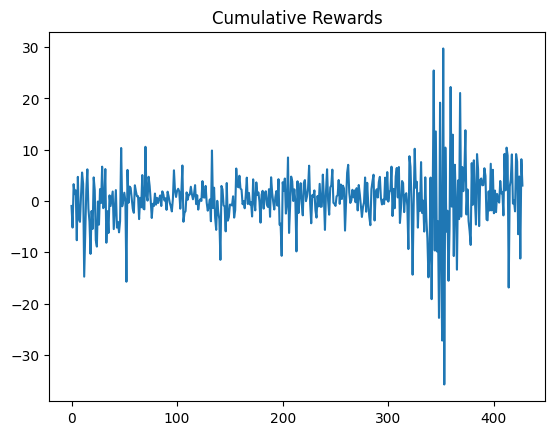

Total Reward: 142.65


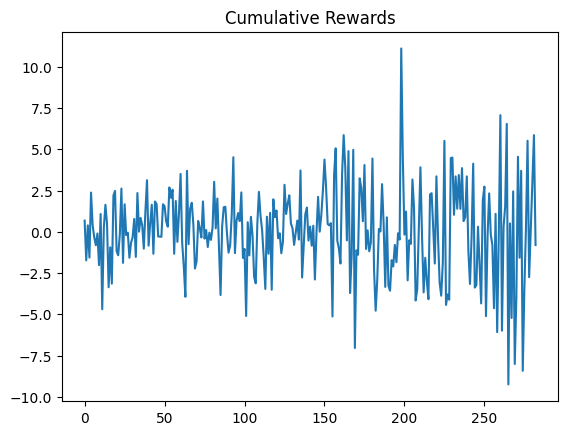

Total Reward: 14.680000000000007


In [26]:
import matplotlib.pyplot as plt

def backtest(model, env):
    obs = env.reset()
    total_reward = 0
    rewards = []
    
    for _ in range(len(env.data) - 1):
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        rewards.append(reward)
        total_reward += reward
        if done:
            break
    
    plt.plot(rewards)
    plt.title("Cumulative Rewards")
    plt.show()

    print(f"Total Reward: {total_reward}")

# Run Backtest
backtest(pre_crash_model, pre_crash_env)
backtest(post_crash_model, post_crash_env)
